In [67]:
from rdflib import Graph, Namespace, Literal
from rdflib.plugins.sparql import prepareQuery
from pandas import DataFrame
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
from rdflib.namespace import RDF, RDFS, XSD
CT = Namespace("http://example.org/clinicalTrial/")
XSD = Namespace("http://www.w3.org/2001/XMLSchema#")

g = Graph()
g.parse("CT_graph.ttl", format="ttl")

<Graph identifier=Nb74e78ada0d24fedbd479a3afdfe307e (<class 'rdflib.graph.Graph'>)>

# evaluating quality

In [48]:
Hquery = '''
PREFIX ct: <http://example.org/clinicalTrial/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT (COUNT(DISTINCT ?trial) AS ?numTrials)
WHERE {
  ?trial rdf:type ct:ClinicalTrial ;
         ct:hasMedicalDetails ?medDetails .
  ?medDetails ct:conditions ?condition .
  FILTER(CONTAINS (?condition, "Heart Failure"))
}
'''

Hresults = g.query(Hquery)

In [49]:
for row in Hresults:
    print(f"Number of trials with heart failure as condition: {row.numTrials}")

Number of trials with heart failure as condition: 5227


In [43]:
USquery = '''
PREFIX ct: <http://example.org/clinicalTrial/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT (COUNT(DISTINCT ?trial) AS ?numTrials)
WHERE {
  ?trial rdf:type ct:ClinicalTrial ;
         ct:hasLocationInfo ?locationInfo .
  ?locationInfo ct:locations ?location .
  FILTER(CONTAINS(?location, "United States"))
}
'''
USresults = g.query(USquery)

In [44]:
for row in USresults:
    num_trials = row[0]
    print(f"Number of trials in the USA: {num_trials}")

Number of trials in the USA: 170559


In [51]:
IBUquery = '''
PREFIX ct: <http://example.org/clinicalTrial/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT (COUNT(DISTINCT ?trial) AS ?numTrials)
WHERE {
  ?trial rdf:type ct:ClinicalTrial ;
         ct:hasMedicalDetails ?medDetails .
  ?medDetails ct:interventions ?intervention .
  FILTER(CONTAINS(lcase(?intervention), "ibuprofen"))
}

'''
IBUresults = g.query(IBUquery)

In [52]:
for row in IBUresults:
    num_ibu = row[0]
    print(f"Number of trials using ibuprofen: {num_ibu}")

Number of trials using ibuprofen: 630


# Gaining insights

What are the most common conditions studied across all clinical trials?

In [53]:
Comconquery = '''
PREFIX ct: <http://example.org/clinicalTrial/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?condition (COUNT(?trial) AS ?numTrials)
WHERE {
  ?trial rdf:type ct:ClinicalTrial ;
         ct:hasMedicalDetails ?medDetails .
  ?medDetails ct:conditions ?condition .
}
GROUP BY ?condition
ORDER BY DESC(?numTrials)
LIMIT 10
'''

Comconresults =g.query(Comconquery)

In [55]:
dataC = DataFrame(Comconresults, columns=['Condition', 'Number of Trials'])

# Display the DataFrame
dataC

,Condition,Number of Trials
0,Healthy,9759
1,Breast Cancer,7523
2,Obesity,6585
3,Stroke,4099
4,Hypertension,4035
5,Depression,3932
6,Prostate Cancer,3847
7,Pain,3798
8,HIV Infections,3760
9,Asthma,3381


follow up question what is the distribution of Obesity trials over the years?

In [66]:
thickquery = '''
PREFIX ct: <http://example.org/clinicalTrial/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?trial ?startDate
WHERE {
  ?trial rdf:type ct:ClinicalTrial ;
         ct:hasMedicalDetails ?medDetails ;
         ct:startDate ?startDate .
  ?medDetails ct:conditions ?condition .
  FILTER(CONTAINS(?condition, "Obesity"))
}
ORDER BY ?startDate
'''
thickresults = g.query(thickquery)

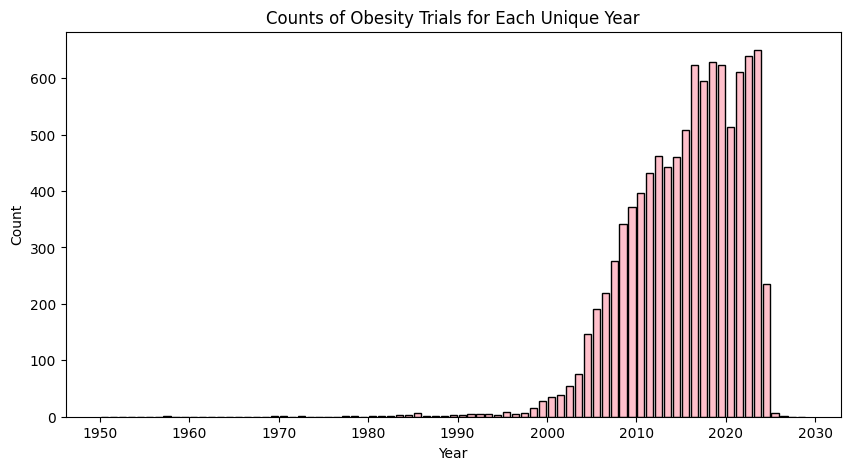

In [85]:
# Extract unique years from thickresults
thick_unique_years = [int(row[1].split('-')[0]) for row in thickresults]



# Plot the bar chart
plt.figure(figsize=(10, 5))

# Set the labels and title
plt.hist(thick_unique_years, bins=range(1950, 2030), rwidth=0.8, color='pink', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of Obesity Trials for Each Unique Year')

# Show the plot
plt.show()


In [76]:
yearquery = '''
PREFIX ct: <http://example.org/clinicalTrial/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?trial ?startDate
WHERE {
  ?trial rdf:type ct:ClinicalTrial ;
         ct:startDate ?startDate .
}
ORDER BY ?startDate
'''
yearresults = g.query(yearquery)

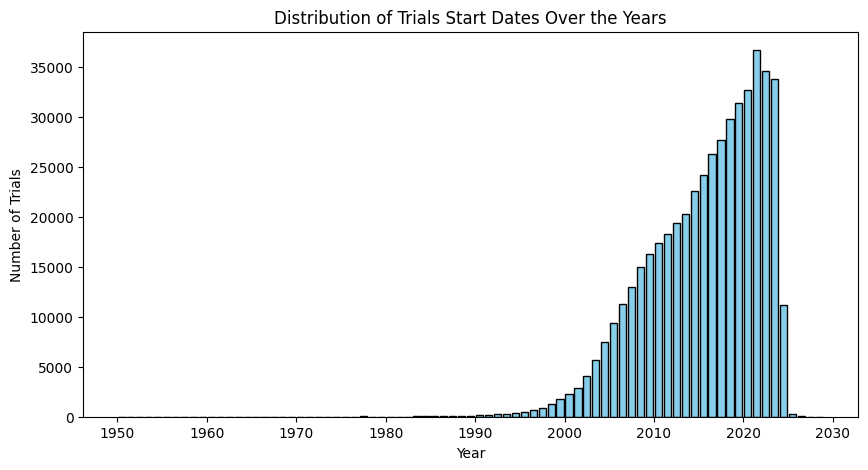

In [90]:
import matplotlib.pyplot as plt

# Extract unique years from yearresults
unique_years = [int(row[1].split('-')[0]) for row in yearresults]

# Create a new figure with a specific height
plt.figure(figsize=(10, 5))

# Plot the histogram with narrower bars
plt.hist(unique_years, bins=range(1950, 2030), rwidth=0.8, color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of Trials')
plt.title('Distribution of Trials Start Dates Over the Years')


plt.show()

In [92]:

unique = set(thick_unique_years)
year_counts = {year: thick_unique_years.count(year) for year in unique}
unique2 = set(unique_years)
year_counts2 = {year: unique_years.count(year) for year in unique2}

percentage = {year: (year_counts[year] / year_counts2[year]) * 100 for year in year_counts.keys() if year in year_counts2}
percentage

{1957: 50.0,
 1969: 50.0,
 1970: 50.0,
 1972: 12.5,
 1977: 4.166666666666666,
 1978: 4.761904761904762,
 1980: 10.0,
 1981: 7.142857142857142,
 1982: 5.555555555555555,
 1983: 8.333333333333332,
 1984: 6.8181818181818175,
 1985: 13.333333333333334,
 1986: 2.0,
 1987: 3.1746031746031744,
 1988: 1.0526315789473684,
 1989: 2.9702970297029703,
 1990: 2.2900763358778624,
 1991: 2.185792349726776,
 1992: 1.7857142857142856,
 1993: 1.644736842105263,
 1994: 0.9090909090909091,
 1995: 1.5841584158415842,
 1996: 0.7727975270479135,
 1997: 0.6912442396313364,
 1998: 1.2461059190031152,
 1999: 1.6184971098265895,
 2000: 1.520417028670721,
 2001: 1.3439007580978637,
 2002: 1.335275552318524,
 2003: 1.3441811107180757,
 2004: 1.9691895512391158,
 2005: 2.0451868508405613,
 2006: 1.9356549407813328,
 2007: 2.131274131274131,
 2008: 2.2846040466300415,
 2009: 2.277191259513872,
 2010: 2.273510161901481,
 2011: 2.35769251760083,
 2012: 2.3841469707916194,
 2013: 2.181746384323017,
 2014: 2.04181277464

Which sponsors are involved in the highest number or trials?

In [59]:
sponsorquery = '''
PREFIX ct: <http://example.org/clinicalTrial/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?sponsor (COUNT(?trial) AS ?numTrials)
WHERE {
    ?trial rdf:type ct:ClinicalTrial ;
                ct:hasCollaborationDetails ?collabdetails .
    ?collabdetails ct:sponsor ?sponsor .
    
}
GROUP BY ?sponsor
ORDER BY DESC(?numTrials)
LIMIT 10
'''
sponsorResults = g.query(sponsorquery) 

In [60]:
dataS = DataFrame(sponsorResults, columns=['Sponsor', 'Number of Trials'])
dataS

,Sponsor,Number of Trials
0,GlaxoSmithKline,3482
1,National Cancer Institute (NCI),3411
2,Assiut University,3373
3,Cairo University,3057
4,Pfizer,3053
5,AstraZeneca,3031
6,Assistance Publique - Hôpitaux de Paris,2961
7,Mayo Clinic,2777
8,M.D. Anderson Cancer Center,2710
9,Novartis Pharmaceuticals,2398


What is the average study duration up until the primary completion date and what is the average time between the primary completion date and completion date?

In [63]:
durationquery = '''
PREFIX ct: <http://example.org/clinicalTrial/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?trial ?startDate ?primaryCompletionDate ?completionDate
WHERE {
  ?trial rdf:type ct:ClinicalTrial ;
         ct:startDate ?startDate ;
         ct:primaryCompletionDate ?primaryCompletionDate ;
         ct:completionDate ?completionDate .
}
'''
durationresults = g.query(durationquery)

In [93]:

durations1 = []
durations2 = []
for result in durationresults:
    start_date = datetime.strptime(result['startDate'], "%Y-%m-%d")
    completion_date = datetime.strptime(result['completionDate'], "%Y-%m-%d")
    primary_completion_date = datetime.strptime(result['primaryCompletionDate'], "%Y-%m-%d")

    # Calculate duration of the trial
    duration1 = primary_completion_date - start_date
    durations1.append(duration1.days)
    duration2 = completion_date - primary_completion_date
    durations2.append(duration2.days)

# Calculate average duration
if durations1:
    average_duration = sum(durations1) / len(durations1)
    print("Average duration of clinical trials until primary completion:", average_duration, "days")
else:
    print("No clinical trials found with all required dates in the graph.")

if durations2:
    average_duration2 = sum(durations2) / len(durations2)
    print("Average duration of clinical trials from primary completion till completion:", average_duration2, "days")

# Find the longest and shortest durations of duration1
longest_duration1 = max(durations1)
shortest_duration1 = min(durations1)

# Find the longest and shortest durations of duration2
longest_duration2 = max(durations2)
shortest_duration2 = min(durations2)

print("Longest duration of duration1:", longest_duration1, "days")
print("Shortest duration of duration1:", shortest_duration1, "days")
print("Longest duration of duration2:", longest_duration2, "days")
print("Shortest duration of duration2:", shortest_duration2, "days")


Average duration of clinical trials until primary completion: 921.1285448853705 days
Average duration of clinical trials from primary completion till completion: 166.72414066386935 days
Longest duration of duration1: 40177 days
Shortest duration of duration1: -29 days
Longest duration of duration2: 31777 days
Shortest duration of duration2: -488 days
